In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #자주 나타나는 단어 1만개를 사용하겠다.

17464789/17464789 [==============================] - 1s 0us/step


In [4]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index() #단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #정수 인덱스와 단어를 매핑하도록 뒤집는다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) #리뷰를 디코딩한다. 0,1,2는 '패딩', '문서시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) #크기가 len(sequences), dimension 이고 모든 원소가 0인 행렬을 만든다.
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. #results[i]에서 특정 인덱스의 위치를 1로 만든다.
  return results

x_train = vectorize_sequences(train_data) #훈련데이터를 벡터로 변환
x_test = vectorize_sequences(test_data) #테스트 데이터를 벡터로 변환

In [9]:
x_train[0] #샘플

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32') #데이터 준비 완료

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 95ms/step - loss: 0.5280 - acc: 0.7777 - val_loss: 0.4000 - val_acc: 0.8656
Epoch 2/20
30/30 [==============================] - 2s 66ms/step - loss: 0.3265 - acc: 0.8930 - val_loss: 0.3179 - val_acc: 0.8815
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2416 - acc: 0.9199 - val_loss: 0.2976 - val_acc: 0.8810
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1990 - acc: 0.9310 - val_loss: 0.2761 - val_acc: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1596 - acc: 0.9493 - val_loss: 0.2817 - val_acc: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1400 - acc: 0.9533 - val_loss: 0.2851 - val_acc: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1178 - acc: 0.9635 - val_loss: 0.3178 - val_acc: 0.8776
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1009 - a

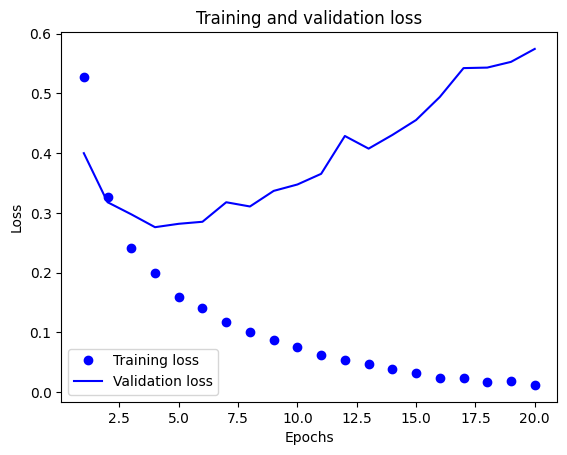

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') #'bo'는 파란색 점을 의미한다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') #'b'는 파란색 실선을 의미한다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

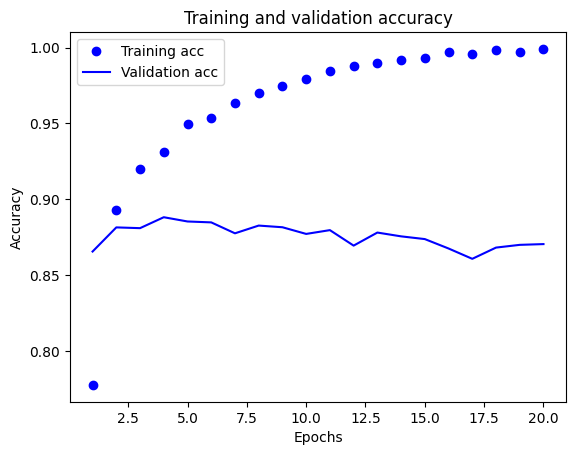

In [19]:
plt.clf() #그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4697 - accuracy: 0.8108
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2748 - accuracy: 0.9024
Epoch 3/4
49/49 [==============================] - 2s 43ms/step - loss: 0.2147 - accuracy: 0.9234
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2854 - accuracy: 0.8864


In [22]:
results

[0.2853509485721588, 0.8863599896430969]

In [23]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.1814169 ],
       [0.99974245],
       [0.66858053],
       ...,
       [0.09067097],
       [0.06671336],
       [0.48276353]], dtype=float32)